# <center> <span style="color:red"> Compte rendu TP1 Analyse Numérique </span> </center>

<hr>

## Exercice 1:
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

### Correction : <h3>


#### Question 1 :

In [2]:
#Expression réduite
def p(x):
    return (x-1)**6 # ** puissance 
p(3)

64

In [3]:
#expression developpée
def f(x):
    return x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1
f(3)

64

In [4]:
print('p({})={} '.format(0.998,p(0.998)))
print('f({})={} '.format(0.998,f(0.998)))

p(0.998)=6.400000000000034e-17 
f(0.998)=1.7763568394002505e-15 


In [20]:
import numpy
print('Expression réduite')
for i in numpy.arange(0.998, 1.002,0.0001):
    print('p(i)= ' , p(i))
print('            ')
print('--------------------------------------------------------------------')
print('            ')
print('Expression developpée')
for i in numpy.arange(0.998, 1.002,0.0001):
    print('f(i)= ' , f(i))
print('--------------------------------------------------------------------')
print(p(i)==f(i))

Expression réduite
p(i)=  6.400000000000034e-17
p(i)=  4.70458810000019e-17
p(i)=  3.40122240000027e-17
p(i)=  2.4137569000002966e-17
p(i)=  1.6777216000002883e-17
p(i)=  1.139062500000259e-17
p(i)=  7.52953600000219e-18
p(i)=  4.826809000001757e-18
p(i)=  2.985984000001342e-18
p(i)=  1.771561000000975e-18
p(i)=  1.0000000000006715e-18
p(i)=  5.314410000004355e-19
p(i)=  2.6214400000026335e-19
p(i)=  1.1764900000014617e-19
p(i)=  4.665600000007277e-20
p(i)=  1.562500000003131e-20
p(i)=  4.096000000010936e-21
p(i)=  7.290000000027557e-22
p(i)=  6.400000000038403e-23
p(i)=  1.0000000000126618e-24
p(i)=  1.1985091468012028e-94
p(i)=  9.999999999860165e-25
p(i)=  6.399999999953138e-23
p(i)=  7.289999999962809e-22
p(i)=  4.095999999983651e-21
p(i)=  1.562499999994804e-20
p(i)=  4.6655999999865574e-20
p(i)=  1.1764899999969834e-19
p(i)=  2.6214399999939023e-19
p(i)=  5.314409999988621e-19
p(i)=  9.99999999998007e-19
p(i)=  1.7715609999966836e-18
p(i)=  2.9859839999947116e-18
p(i)=  4.8268089

<span style="color:red"> on ne trouve pas les mêmes valeurs !!!! </span> 

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def horner(a,z):
    n=len(a)
    result=a[0]
    for i in a[1:]:
        result=result*z+i
    return result

T=[1,-6,15,-20,15,-6,1]
X=np.arange(0.998,1.002,0.001)
for i in X:
    print(horner(T,i))

-1.3322676295501878e-15
-2.220446049250313e-15
0.0
-6.661338147750939e-16
-6.661338147750939e-16


#### Question 2 :

### <span style="color:green"> graphique </span>

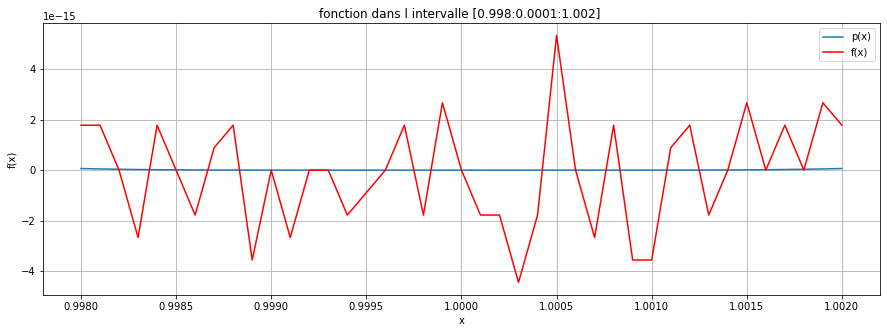

In [24]:
x = np.arange(0.998, 1.002, 0.0001)
p = lambda x:(x-1)**6 
fig = plt.figure(1, figsize=(15, 5))
plt.plot(x,p(x))
f = lambda x: x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1
fig = plt.figure(1, figsize=(15, 10))
plt.plot(x,f(x),'r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('fonction dans l intervalle [0.998:0.0001:1.002] ')
plt.legend(('p(x)', 'f(x)'))
plt.grid(True)   
plt.show()

##  <h2 style="color:black" > EXERCICE 2: </h2>

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.

>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

### Correction : <h3>

#### Question 1 :

## <center><span style="color:green">Méthode de dichotomie: </span> </center>
La <span style="color:red">méthode de dichotomie</span> est une méthode pour trouver une solution approchée
à une équation $f(x)=0$. Précisément, supposons que la fonction $f$ est continue sur l'intervalle $[a,b]$,
avec $f(a)\leq 0$ et $f(b)\geq 0$. On sait donc qu'il existe au moins un réel $c$ dans l'intervalle $[a,b]$
tel que $f( c)=0$.</p>
<hr>
L'idée est alors d'évaluer ce que vaut $f$ au milieu de $[a,b]$, et de distinguer les deux cas suivants :
<hr>
<div class=liste>
<ul>
<li>si $f\left(\frac{a+b}2\right)\leq 0$, alors on sait qu'on a une racine dans l'intervalle $\left[\frac{a+b}2,b\right]$.
<li>sinon, $f\left(\frac{a+b}2\right)> 0$ et on sait qu'on a une racine dans l'intervalle $\left[a,\frac{a+b}2\right]$.
</ul>
</div> 
<hr>
Ainsi, dans les deux cas, on a trouvé un intervalle de longueur moitié dans lequel est située une racine de l'équation
$f(x)=0$. On recommence alors avec cet intervalle, et ainsi de suite jusqu'à ce qu'on trouve une approximation
qui nous convienne.</p>
Formellement, on définit les suites $(a_n)$ et $(b_n)$ en posant :
<hr>
<div class=liste>
<ul>
<li>$a_0=a$ et $b_0=b$.
<li>si $f\left(\frac{a_n+b_n}2\right)\leq 0$, alors $a_{n+1}=\frac{a_n+b_n}2$ et $b_{n+1}=b_n$.
<li>sinon, $a_{n+1}=a_n$ et $b_{n+1}=\frac{a_n+b_n}2$.
</ul>
</div>
<hr>
On a toujours une solution à l'équation $f(x)=0$ dans l'intervalle $[a_n,b_n]$, qui est de longueur
$(b_n-a_n)/2^n$.
<hr>

f =

@(x) x .^ 3 + x .^ 2 - 3 * x - 3



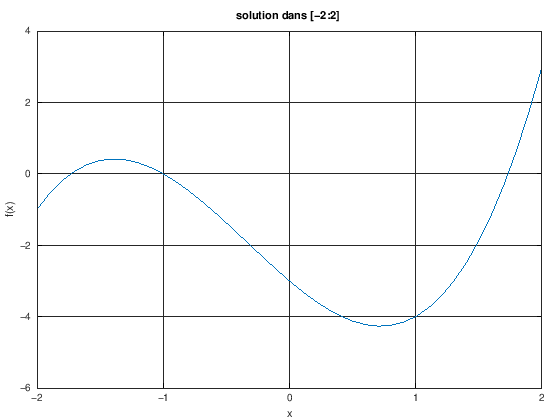

In [1]:
T=[-2:0.1:2];
TT=linspace(-2,2,41);# subdivision de [-2,2] en 40 subdivision ( 41 ponts)
f=@(x) x.^3+x.^2-3*x-3 
t=[-2:0.1:2];# (2-(-2))/0.1+1 (b-a)/pas +1
plot(t,f(t))
title ("solution dans [-2:2] ");
xlabel ("x");
ylabel ("f(x)");
grid on

### Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

## Version Python

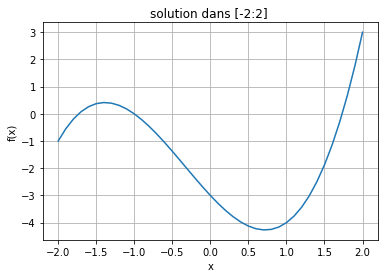

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))

#### Question 2 :

In [2]:
def dicho(a,b,f,eps):
    
    while (b-a)>eps:
        m=(a+b)/2
        if f(m)==0:
            return m
        if f(a)*f(m)<0 :
            b=m
        else :
            a=m
    return m

In [3]:
f=lambda x: x**3+x**2-3*x-3
dicho(-2,-1.5,f,0.001)

-1.7314453125

#### Question 3 :

In [4]:
def dichow(a,b,f,err):
    cp=0
    while (b-a)>err:
        m=(a+b)/2
        if f(m)==0:
            return m
        if f(a)*f(m)<0 :
            b=m
        else :
            a=m
        cp+=1
    return m,cp

In [5]:
f=lambda x: x**3+x**2-3*x-3
dichow(-2,-1.5,f,0.001)

(-1.7314453125, 9)

(-1.7314453125,<span style="color:red">9</span>) ==> Aprés 9 itérations on trouve la valeur de α

<strong>Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés </strong>

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

#### Limite de la méthode <br>
la methode de la dichotomie est tres lente .elle demande assez de calcul

##  <h2 style="color:black" > Exercice 3 : </h2>

>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
> 
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
> 
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?

### Correction : <h3>

## <center><span style="color:green">Méthode de point fixe: </span> </center>


</li></ul><div class="wimsdoc"><br class="spacer" />Le principe de cette méthode consiste à transformer l'équation

<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml573855" mathsize="110%"><mi>f</mi><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><mn>0</mn></mstyle></math></span> en une équation équivalente 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml575727" mathsize="110%"><mi>g</mi><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><mi>x</mi></mstyle></math></span> où 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml577205" mathsize="110%"><mi>g</mi></mstyle></math></span> est une fonction
auxiliaire "bien" choisie. Le point 
<img src="https://wims.univ-cotedazur.fr/wims/mathfonts/109/alpha.gif" style="margin:0px; border:none" alt="alpha" /> est alors un <span style="font-style&#58; italic;font-weight&#58; bold;color&#58;navy;"> point fixe </span>   de

<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml578660" mathsize="110%"><mi>g</mi></mstyle></math></span>. Approcher les zéros de 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml579987" mathsize="110%"><mi>f</mi></mstyle></math></span> revient à approcher les points
fixes de 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml581378" mathsize="110%"><mi>g</mi></mstyle></math></span>. Le choix de la fonction 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml582785" mathsize="110%"><mi>g</mi></mstyle></math></span> est motivé par les exigences du
théorème de point fixe. En effet, elle doit être
contractante dans un voisinage 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml584099" mathsize="110%"><mi>I</mi></mstyle></math></span> de 
<img src="https://wims.univ-cotedazur.fr/wims/mathfonts/109/alpha.gif" style="margin:0px; border:none" alt="alpha" />, ce qui revient à vérifier
que 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml585401" mathsize="110%"><mrow><mo stretchy="true">&VerticalBar;</mo><mi>g</mi><mo>&prime;</mo><mrow><mo stretchy="true">(</mo><mi>x</mi><mo stretchy="true">)</mo></mrow><mo stretchy="true">&VerticalBar;</mo></mrow><mo>&lt;</mo><mn>1</mn></mstyle></math></span> sur ce voisinage.
Dans ce cas, on construit une suite 
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml586641" mathsize="110%"><msub><mrow><mo stretchy="true">(</mo><msub><mi>x</mi> <mi>n</mi></msub><mo stretchy="true">)</mo></mrow> <mrow><mi>n</mi><mo>&Element;</mo><mi>&Nopf;</mi></mrow></msub></mstyle></math></span>
définie par&#58;<div class="math">
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml587856" mathsize="110%"><mstyle displaystyle="true"><mrow><mo stretchy="true">{</mo><mrow><mtable rowspacing="0.5ex"><mtr><mtd><msub><mi>x</mi> <mn>0</mn></msub><mspace width="thickmathspace"></mspace><mtext> dans un voisinage </mtext><mspace width="thickmathspace"></mspace><mi>I</mi><mspace width="thickmathspace"></mspace><mtext> de </mtext><mspace width="thickmathspace"></mspace><mi>&alpha;</mi></mtd></mtr> <mtr><mtd><mo>&forall;</mo><mspace width="thickmathspace"></mspace><mi>n</mi><mo>&geq;</mo><mn>0</mn><mo>,</mo><mspace width="thickmathspace"></mspace><msub><mi>x</mi> <mrow><mi>n</mi><mo>+</mo><mn>1</mn></mrow></msub><mo>=</mo><mi>g</mi><mo stretchy="false">(</mo><msub><mi>x</mi> <mi>n</mi></msub><mo stretchy="false">)</mo></mtd></mtr></mtable></mrow></mrow></mstyle></mstyle></math></span></div><br class="spacer" /> Il ne reste plus qu'à appliquer <span style="font-style&#58; italic;font-weight&#58; bold;color&#58;navy;"> localement</span>   le <span style="font-style&#58; italic;font-weight&#58; bold;color&#58;navy;">théorème de point
fixe</span>   pour démontrer que
<div class="math">
<span class="wims_mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mstyle id="wims_mathml589121" mathsize="110%"><mstyle displaystyle="true"><mrow><mi>&alpha;</mi><mo>=</mo><munder><mi>lim</mi> <mrow><mi>n</mi><mo>&longrightarrow;</mo><mo lspace="verythinmathspace" rspace="0em">+</mo><mn>&infin;</mn></mrow></munder><msub><mi>x</mi> 

#### Question 1 :

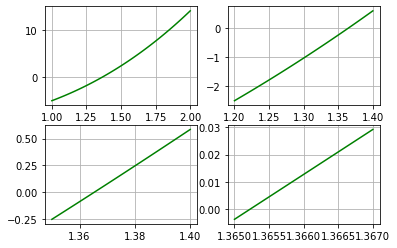

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'g')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'g')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'g')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'g')
plt.grid(True)

#### Question 2 :

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

$$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

#### Question 3 :

In [2]:
import math
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*(math.sqrt(10-x**3))
g2=lambda x: math.sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0
    for i in range(nmax):
        x=zero 
        zero=g(x)
        erreur=abs(zero-x)
        print(zero)
        if erreur<eps:
            return zero,i
    print('pas de convergence avec le nombre d''iteration indique')

In [3]:
ptfixe(g2,1.5,0.001,50)

1.348399724926484
1.3673763719912828
1.364957015402487
1.3652647481134421


(1.3652647481134421, 3)

In [4]:
ptfixe(g1,1.5,0.001,50)

1.286953767623375
1.4025408035395783
1.3454583740232942
1.3751702528160383
1.360094192761733
1.3678469675921328
1.3638870038840212
1.36591673339004
1.364878217193677
1.365410061169957


(1.365410061169957, 9)

In [5]:
ptfixe(g3,1.5,0.001,5)

-0.875
6.732421875
-469.72001200169325
102754555.18738511
-1.0849338705317464e+24
pas de convergence avec le nombre diteration indique


## observation :
<span style="color:red">
1- g2 converge aprés 3 itérations seulement <br>
2- g2 est plus convergente que g1 <br>
3- g3 diverge 
    </span>

##  <h2 style="color:black" > Exercice 4: </h2>
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### Correction : <h3>

## <center><span style="color:green">Méthode de Newton: </span> </center>

#### Question 1:

In [8]:
from sympy import *
from sympy.abc import x

f=lambda x: exp(-x)-x
fprime=lambdify(x,diff(f(x),x,1)) 
x2=0.5
x1=x2
x2=x1-(f(x1)/fprime(x1))
print(x2)

0.566311003197218


#### Question 2:

In [11]:
def newton(f,fprime,a,err):
    x1=a
    x2=x1-(f(x1)/fprime(x1))
    while abs(x1-x2)>err :
        x1=x2
        x2=x1-(f(x1)/fprime(x1))
        m=x2
    return m

In [10]:
import math
from sympy import *
from sympy.abc import x

f=lambda x: math.exp(-x)-x
fprime=lambda x: -math.exp(-x)-1
newton(f,fprime,0,0.001)

0.5671431650348622